# Source

https://cv.gluon.ai/build/examples_detection/demo_faster_rcnn.html

In [ ]:
%matplotlib inline
!pip3 install gluoncv --upgrade
# !pip3 install mxnet
!pip install mxnet-cu101

     |████████████████████████████████| 1.3 MB 7.4 MB/s 
     |████████████████████████████████| 358.1 MB 5.0 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# 02. Predict with pre-trained Faster RCNN models

This article shows how to play with pre-trained Faster RCNN model.

First let's import some necessary libraries:



In [ ]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils
from gluoncv.utils import try_import_cv2
cv2 = try_import_cv2()
import mxnet as mx

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


## Load a pretrained model

Let's get an Faster RCNN model trained on Pascal VOC
dataset with ResNet-50 backbone. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.FasterRCNN`
with a default context of `cpu(0)`.



In [ ]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

## Load a pretrained model (COCO Dataset)

Get a pretrained model trained on COCO Dataset

In [ ]:
model = 'faster_rcnn_fpn_syncbn_resnest269_coco'
net = model_zoo.get_model(model, pretrained=True)

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/contrib/nn/basic_layers.py:240: UserWarning: Caution using SyncBatchNorm: if not using all the GPUs, please mannually set num_devices
  UserWarning)
/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


514675KB [00:14, 35210.11KB/s]                            


In [ ]:
print(net.classes)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## Pre-process an image

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



In [ ]:
# im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
#                           'gluoncv/detection/biking.jpg?raw=true',
#                           path='biking.jpg')
im_fname = 'Picture1.jpg'
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)
img = cv2.imread(im_fname)
h, w, _ = img.shape
print(x.shape)

(1, 3, 600, 800)


## Inference and display

The Faster RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates. Their shape are (batch_size, num_bboxes, 1),
(batch_size, num_bboxes, 1) and (batch_size, num_bboxes, 4), respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



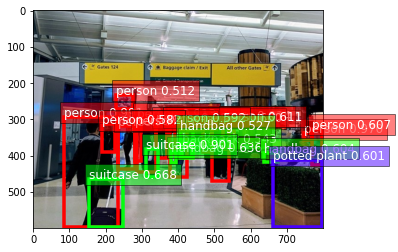

True

In [ ]:
# box_ids, scores, bboxes = net(x)
# ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

# plt.show()

box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

orig_img = utils.viz.cv_plot_bbox(orig_img, bboxes[0], scores[0], 
                                  box_ids[0], class_names=net.classes)
orig_img = cv2.resize(orig_img, (w, h))
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
cv2.imwrite(im_fname[:-4]+'_faster_rcnn.jpg', orig_img)